In [3]:
import csv
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict, Counter
import numpy as np
import math
import csv
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import numpy as np
import nltk
from tqdm import tqdm 

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/zaishi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zaishi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zaishi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# id,title,url,score,time,comments,author

with open('data.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

In [5]:
show_hn = []
show_hn_with_i = []
ask_hn = []
with_links = []
show_hn_with_links = []
for d in data:
    if d['title'].startswith('Show HN'):
        show_hn.append(d)
        if 'i' in d['title'].lower().split():
            show_hn_with_i.append(d)
        
        if d['url']:
            show_hn_with_links.append(d)
    elif d['title'].startswith('Ask HN'):
        ask_hn.append(d)
    
    if d['url']:
        with_links.append(d)
    

In [6]:
print('Average score:', sum([int(d['score']) for d in data]) / len(data))
print('Average Show HN score:', sum([int(d['score']) for d in show_hn]) / len(show_hn))
print('Average Ask HN score:', sum([int(d['score']) for d in ask_hn]) / len(ask_hn))
print('Average score of Show HN with "I" in title:', sum([int(d['score']) for d in show_hn_with_i]) / len(show_hn_with_i))

print('Average score with links:', sum([int(d['score']) for d in with_links]) / len(with_links))
print('Average score of Show HN with links:', sum([int(d['score']) for d in show_hn_with_links]) / len(show_hn_with_links))

Average score: 15.177146252128855
Average Show HN score: 16.95587075777148
Average Ask HN score: 12.771544546865476
Average score of Show HN with "I" in title: 34.27224199288256
Average score with links: 15.388826578950791
Average score of Show HN with links: 17.330706832475702


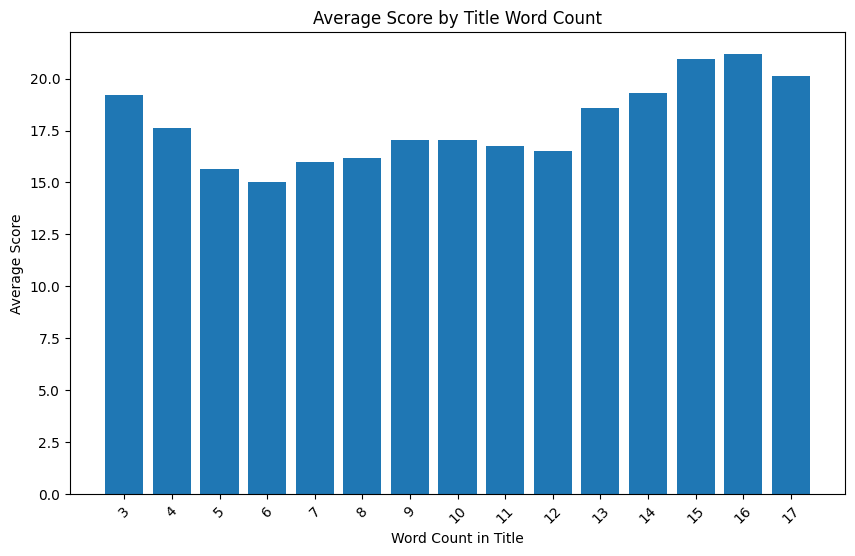

In [24]:
# Step 1: Load the data and calculate word counts
word_counts = defaultdict(list)
for row in show_hn:
    word_count = len(row['title'].split())
    word_counts[word_count].append(int(row['score']))

word_counts = {wc: scores for wc, scores in word_counts.items() if len(scores) >= 100}

# Step 2: Calculate average scores for each word count
average_scores = {wc: sum(scores)/len(scores) for wc, scores in word_counts.items()}

# Prepare data for plotting
sorted_word_counts = sorted(average_scores.keys())
average_scores_list = [average_scores[wc] for wc in sorted_word_counts]

# Step 3: Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_scores)), average_scores_list, tick_label=sorted_word_counts)
plt.title('Average Score by Title Word Count')
plt.xlabel('Word Count in Title')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  # Rotate labels to make them readable

plt.show()

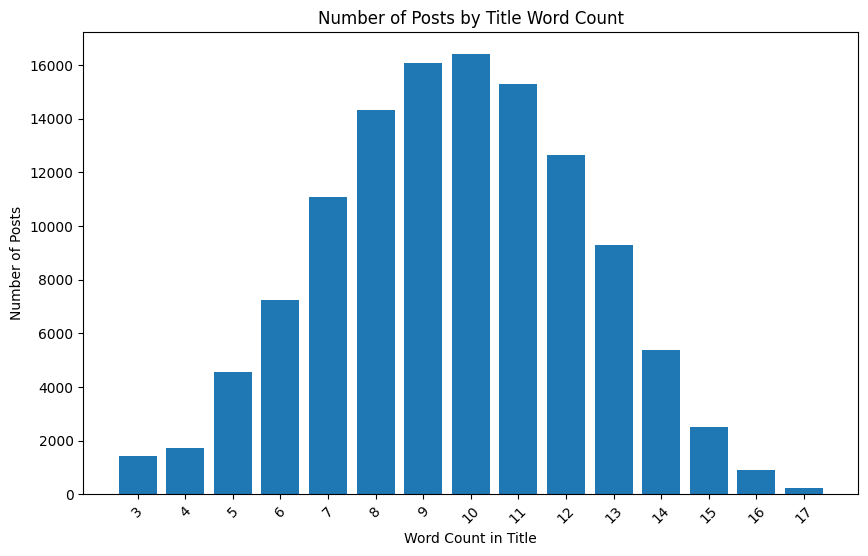

In [29]:
sorted_word_counts = sorted(word_counts.keys())
posts_counts = {}
for row in show_hn:
    word_count = len(row['title'].split())
    if word_count in posts_counts:
        posts_counts[word_count] += 1
    else:
        posts_counts[word_count] = 1

# Step 2: Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_word_counts)), [posts_counts[wc] for wc in sorted_word_counts], tick_label=sorted_word_counts)
plt.title('Number of Posts by Title Word Count')
plt.xlabel('Word Count in Title')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)  # Rotate labels to make them readable

plt.show()

In [28]:
print(sorted_word_counts)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [52]:
# Initialize lemmatizer and define stopwords
lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))
stop_words = set()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return lemmatized

lemma_to_scores = {}

for d in tqdm(show_hn):
# for d in tqdm(data):
    tokens = preprocess_text(d['title'])
    for token in tokens:
        if token not in lemma_to_scores:
            lemma_to_scores[token] = []
        lemma_to_scores[token].append(int(d['score']))

lemma_to_scores = {lemma: scores for lemma, scores in lemma_to_scores.items() if len(scores) >= 100}

lemma_to_avg_score = {lemma: sum(scores) / len(scores) for lemma, scores in lemma_to_scores.items()}

print('Top 100 lemmas by average score, at least 100 occurence (lemma, avg_score, num_occurence):')
for lemma, avg_score in sorted(lemma_to_avg_score.items(), key=lambda x: x[1], reverse=True)[:100]:
    print(lemma, avg_score, len(lemma_to_scores[lemma]))

100%|██████████| 119218/119218 [00:08<00:00, 13322.03it/s]

Top 100 lemmas by average score, at least 100 occurence (lemma, avg_score, num_occurence):
been 59.95 140
selfhosted 55.84453781512605 238
ive 52.736111111111114 216
sqlite 48.73148148148148 108
im 48.603960396039604 303
wrote 45.00923076923077 325
scratch 43.96638655462185 119
alternative 43.38534031413612 955
6 42.59016393442623 122
emulator 41.53333333333333 120
wikipedia 41.30107526881721 186
year 41.26732673267327 404
simulator 40.94954128440367 218
logo 40.135714285714286 140
pdfs 39.89320388349515 103
opensource 39.261661807580175 1372
lisp 38.558375634517766 197
latex 38.46363636363636 110
linux 37.5967365967366 429
look 37.411764705882355 187
ide 36.73770491803279 183
postgres 36.5 160
webrtc 36.333333333333336 168
base 34.81308411214953 107
implemented 34.56637168141593 113
i 34.41924471943674 4687
hacking 33.983333333333334 120
browse 33.56818181818182 220
svg 33.508849557522126 226
working 33.15151515151515 264
gui 33.028112449799195 249
after 33.0 182
background 32.45 180


In [43]:
for d in show_hn:
    words = preprocess_text(d['title'])
    if '6' in words and int(d['score']) > 30:
        print(d['score'], d['title'])

89 Show HN: Bookvine.io – Help find age appropriate books for kids aged 6 to 14
858 Show HN: 6 months ago I quit my job to pursue indie dev. Here is our first game
144 Show HN: Enter your URL and view CVEs affecting your stack over last 6 months
397 Show HN: I've been making JavaScript sandbox alone for 6 years
66 Show HN: Enter a message, delivery at a random time up to 6 months from now
125 Show HN: My side project just reached #6 on App Store music charts
181 Show HN: I built an intercom for my 6 yo to keep us connected during quarantine
51 Show HN: TouchScale.co, weigh things in Safari on iPhone 6S
286 Show HN: Vinepeek - watch the world in realtime in 6 second snippets
151 Show HN: I spent 6 years making a cool free game
128 Show HN: 51,000 6 character domains
151 Show HN: Kody Tools – I developed 300 tools in 6 months
58 Show HN: We did Google Duplex for businesses in 6 months with a team of 3
113 Show HN: I built a Wi-Fi 6 survey kit to see how common it was in my area
128 Show 

In [46]:
for d in show_hn:
    words = preprocess_text(d['title'])
    if 'been' in words and int(d['score']) > 30:
        print(d['score'], d['title'])

819 Show HN: I've been writing daily TILs for a year
397 Show HN: I've been making JavaScript sandbox alone for 6 years
301 Show HN: An OS X music library I've been working on for the past year.
124 Show HN: One Way Dungeon – A game I've been developing in the last five months
46 Show HN: Hello Python, my book about learning python, has just been released
72 Show HN: A little knowledge portal I've been building
165 Show HN: A game I've been working on for the last year is out today
47 Show HN: Have I Been Pwned donations page is awesome
2690 Show HN: A retro video game console I've been working on in my free time
87 Show HN: DataTau (HN clone for data science) has been down, so we cloned it
48 Show HN: The Tao of tmux, available for free on the web, has been newly edited
362 Show HN: I've been making one HTML5 game per week. Here's my 10th game
1020 Show HN: OneBody Church Directory software I've been hacking on for 7 years
33 Show HN: We've been working on this idea, would love feedba